In [36]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

**EDA**

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric)
#df = df.astype({"TotalCharges": float64})
#df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771363
min,0.000000,0.000000,18.250000,18.799999
25%,0.000000,9.000000,35.500000,401.449997
50%,0.000000,29.000000,70.350000,1397.475037
75%,0.000000,55.000000,89.850000,3794.737488
max,1.000000,72.000000,118.750000,8684.799805


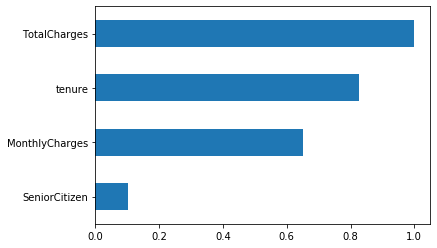

In [11]:
df.corr()['TotalCharges'].sort_values().head(10).plot.barh();

In [12]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'}) 

In [14]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)

In [15]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes


In [16]:
df.drop('customerID', axis=1, inplace = True)

In [17]:
df.shape

(7043, 20)

In [18]:
df = pd.get_dummies(df, drop_first= True)

In [19]:
df.shape

(7043, 31)

In [20]:
df.head(3)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.850000,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.500000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.150002,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


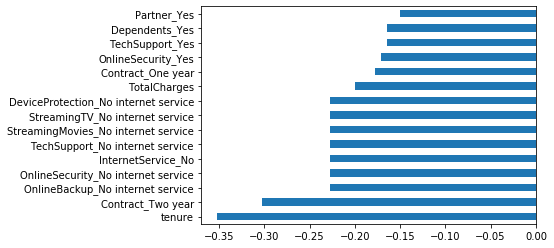

In [21]:
df.corr()['Churn_Yes'].sort_values().head(15).plot.barh();

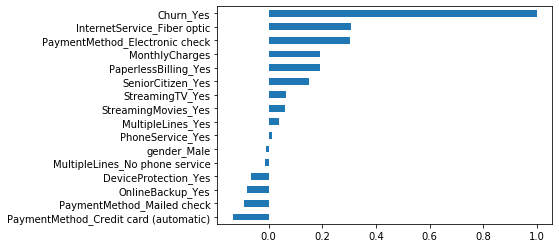

In [22]:
df.corr()['Churn_Yes'].sort_values().tail(16).plot.barh();

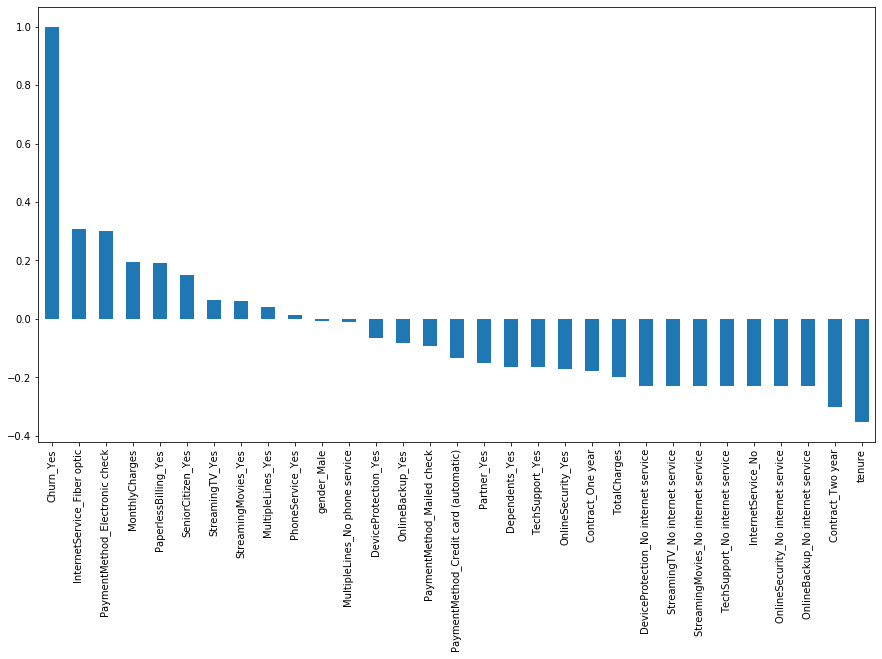

In [46]:
plt.figure(figsize=(15,8))
df.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar');

In [23]:
# sns.pairplot(df);  # takes too much time

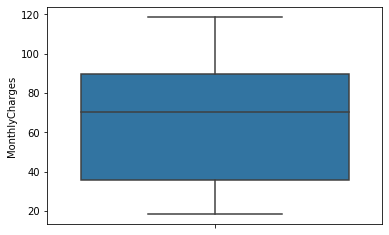

In [24]:
p = sns.boxplot(data=df, y = 'MonthlyCharges')

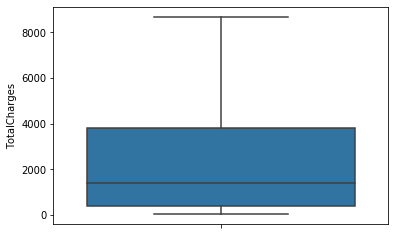

In [25]:
p = sns.boxplot(data=df, y = 'TotalCharges')

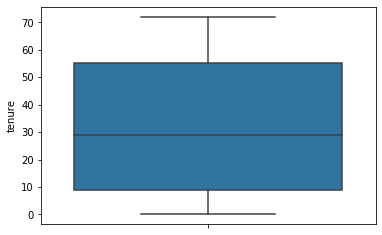

In [26]:
p = sns.boxplot(data=df, y = 'tenure')

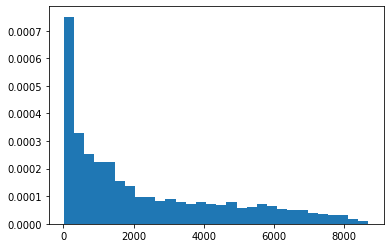

In [41]:
plt.hist(df['TotalCharges'], density=True, bins=30);

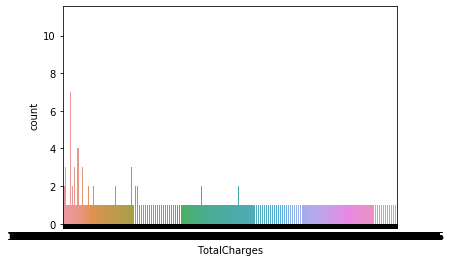

In [42]:
ax = sns.countplot(x="TotalCharges", data=df);

In [ ]:
# scaling may work 

In [54]:
df = df.dropna()

In [55]:
df.isnull().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_Yes                        0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [27]:
# correlation is quite low for some features, like gender_Male, PhoneService_Yes, MultipleLines_Nophone service, but I will not drop them.

**Data pre-Processing**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop('Churn_Yes',axis=1)
y = df['Churn_Yes']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Logistic Regression**

In [59]:
log_model = LogisticRegression()

In [60]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = log_model.predict(X_test)

In [62]:
confusion_matrix(y_test, y_pred)

array([[1151,  149],
       [ 226,  232]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.61      0.51      0.55       458

    accuracy                           0.79      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



**Decision Tree**

In [64]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)

In [65]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1034,  266],
       [ 230,  228]], dtype=int64)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1300
           1       0.46      0.50      0.48       458

    accuracy                           0.72      1758
   macro avg       0.64      0.65      0.64      1758
weighted avg       0.73      0.72      0.72      1758



**Random Forest**

In [67]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

In [68]:
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1160,  140],
       [ 235,  223]], dtype=int64)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1300
           1       0.61      0.49      0.54       458

    accuracy                           0.79      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.79      0.78      1758



**XGBOOST**

In [70]:
from xgboost import XGBClassifier

In [71]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [72]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1131,  169],
       [ 231,  227]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1300
           1       0.57      0.50      0.53       458

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.76      0.77      0.77      1758



**KNN**

In [74]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
knn_model = KNeighborsClassifier()

In [76]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1097,  203],
       [ 230,  228]], dtype=int64)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1300
           1       0.53      0.50      0.51       458

    accuracy                           0.75      1758
   macro avg       0.68      0.67      0.67      1758
weighted avg       0.75      0.75      0.75      1758



**SVM**

In [79]:
svm_model = SVC().fit(X_train, y_train)

In [80]:
y_pred = svm_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1174,  126],
       [ 238,  220]], dtype=int64)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1300
           1       0.64      0.48      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



**GridSearch with SVM**

In [82]:
svm = SVC()

In [83]:
svm_params = {"kernel": ["linear","rbf", "poly", "sigmoid"]}

In [84]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    4.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.1s finished


In [85]:
svm_cv_model.best_params_

{'kernel': 'linear'}

In [86]:
svm = SVC(kernel="linear")

In [87]:
svm_params = {"C": [0.1,0.5,1,10,20,50]}

In [88]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   19.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.6s finished


In [89]:
svm_cv_model.best_params_

{'C': 10}

In [95]:
svm_tuned = SVC(C = 10, kernel="rbf").fit(X_train, y_train)

In [96]:
y_pred = svm_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1122,  178],
       [ 228,  230]], dtype=int64)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1300
           1       0.56      0.50      0.53       458

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.76      0.77      0.76      1758



In [92]:
svm_new = SVC(C = 10, kernel="linear").fit(X_train, y_train)

In [93]:
y_pred = svm_new.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1156,  144],
       [ 212,  246]], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1300
           1       0.63      0.54      0.58       458

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [98]:
svm_new2 = SVC(C = 1, kernel="linear").fit(X_train, y_train)

In [99]:
y_pred = svm_new2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1156,  144],
       [ 214,  244]], dtype=int64)

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1300
           1       0.63      0.53      0.58       458

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



**Random Forest Tuning**

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [102]:
rf = RandomForestClassifier()

In [103]:
rf_params = {'n_estimators' : [50, 100, 300],
             'max_depth': [3, 5, 7],
             'max_features': [2, 4, 6, 8],
             'min_samples_split': [2, 4, 6]
}

In [104]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.6min finished


In [105]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 50}

In [106]:
rf_tuned = RandomForestClassifier(max_depth = 7,
                                  max_features = 4,
                                  min_samples_split = 4,
                                  n_estimators = 50).fit(X_train, y_train)

In [107]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1300
           1       0.64      0.45      0.53       458

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



**Tuning for XGBOOST**

In [108]:
xgb = XGBClassifier()

In [109]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [110]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.1min finished


In [111]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}

In [112]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 3,
                                n_estimators= 300,
                                subsample= 1).fit(X_train, y_train)

In [113]:
y_pred = xgb_tuned.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1300
           1       0.63      0.51      0.56       458

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.80      0.79      1758



In [115]:
confusion_matrix(y_test, y_pred)

array([[1165,  135],
       [ 225,  233]], dtype=int64)

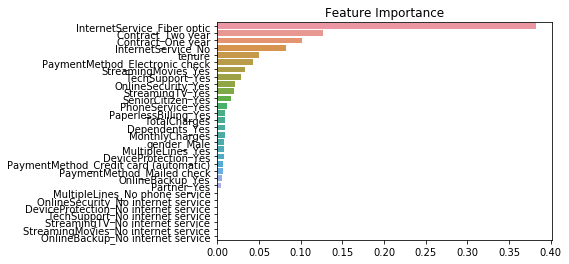

In [116]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()